Objetivo principal: Descrever a evolução da capacidade hospitalar do número de leitos durante a pandemia de Covid-19 em Goiás

In [1]:
#Instalação das bibliotecas necessárias
!pip install pysus --no-deps
!pip install dbfread

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 5.3 MB/s 
  Created wheel for pysus: filename=PySUS-0.6.0-cp38-cp38-linux_x86_64.whl size=1440624 sha256=3a82f8a5904a6a343f0ca28c2c00d2b2e220426b251c6b735c6521ec4be48e2d
  Stored in directory: /root/.cache/pip/wheels/6a/91/14/0df46b481a82ab3041ffc532b78390a1b0281cb010d0a42238
Successfully built pysus
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pysus 0.6.0 requires elasticsearch==7.16.2, which is not installed.
pysus 0.6.0 requires fastparquet==0.8.1, which is not installed.
pysus 0.6.0 requires pandasql==0.7.3, which is not installed.
pysus 0.6.0 requires wget==3.2, which is not installed.
pysus 0.6.0 requires pandas

In [2]:
#Imports das bibliotecas
from ftplib import FTP
import numpy as np
import pandas as pd
import os
from pysus.utilities.readdbc import read_dbc
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
# Lista de municipios retiradas de https://github.com/leogermani/estados-e-municipios-ibge
# Já removi o ultimo digito para ficar igual a ao CODUFMU da lista de leitos
dicionario_municipio = {
520005:"Abadia de Goiás",
520010:"Abadiânia",
520013:"Acreúna",
520015:"Adelândia",
520017:"Água Fria de Goiás",
520020:"Água Limpa",
520025:"Águas Lindas de Goiás",
520030:"Alexânia",
520050:"Aloândia",
520055:"Alto Horizonte",
520060:"Alto Paraíso de Goiás",
520080:"Alvorada do Norte",
520082:"Amaralina",
520085:"Americano do Brasil",
520090:"Amorinópolis",
520110:"Anápolis",
520120:"Anhanguera",
520130:"Anicuns",
520140:"Aparecida de Goiânia",
520145:"Aparecida do Rio doce",
520150:"Aporé",
520160:"Araçu",
520170:"Aragarças",
520180:"Aragoiânia",
520215:"Araguapaz",
520235:"Arenópolis",
520250:"Aruanã",
520260:"Aurilândia",
520280:"Avelinópolis",
520310:"Baliza",
520320:"Barro Alto",
520330:"Bela Vista de Goiás",
520340:"Bom Jardim de Goiás",
520350:"Bom Jesus de Goiás",
520355:"Bonfinópolis",
520357:"Bonópolis",
520360:"Brazabrantes",
520380:"Britânia",
520390:"Buriti Alegre",
520393:"Buriti de Goiás",
520396:"Buritinópolis",
520400:"Cabeceiras",
520410:"Cachoeira Alta",
520420:"Cachoeira de Goiás",
520425:"Cachoeira dourada",
520430:"Caçu",
520440:"Caiapônia",
520450:"Caldas Novas",
520455:"Caldazinha",
520460:"Campestre de Goiás",
520465:"Campinaçu",
520470:"Campinorte",
520480:"Campo Alegre de Goiás",
520485:"Campo Limpo de Goiás",
520490:"Campos Belos",
520495:"Campos Verdes",
520500:"Carmo do Rio Verde",
520505:"Castelândia",
520510:"Catalão",
520520:"Caturaí",
520530:"Cavalcante",
520540:"Ceres",
520545:"Cezarina",
520547:"Chapadão do Céu",
520549:"Cidade Ocidental",
520551:"Cocalzinho de Goiás",
520552:"Colinas do Sul",
520570:"Córrego do Ouro",
520580:"Corumbá de Goiás",
520590:"Corumbaíba",
520620:"Cristalina",
520630:"Cristianópolis",
520640:"Crixás",
520650:"Cromínia",
520660:"Cumari",
520670:"damianópolis",
520680:"damolândia",
520690:"davinópolis",
520710:"Diorama",
520725:"doverlândia",
520735:"Edealina",
520740:"Edéia",
520750:"Estrela do Norte",
520753:"Faina",
520760:"Fazenda Nova",
520780:"Firminópolis",
520790:"Flores de Goiás",
520800:"Formosa",
520810:"Formoso",
520815:"Gameleira de Goiás",
520830:"Divinópolis de Goiás",
520840:"Goianápolis",
520850:"Goiandira",
520860:"Goianésia",
520870:"Goiânia",
520880:"Goianira",
520890:"Goiás",
520910:"Goiatuba",
520915:"Gouvelândia",
520920:"Guapó",
520929:"Guaraíta",
520940:"Guarani de Goiás",
520945:"Guarinos",
520960:"Heitoraí",
520970:"Hidrolândia",
520980:"Hidrolina",
520990:"Iaciara",
520993:"Inaciolândia",
520995:"Indiara",
521000:"Inhumas",
521010:"Ipameri",
521015:"Ipiranga de Goiás",
521020:"Iporá",
521030:"Israelândia",
521040:"Itaberaí",
521056:"Itaguari",
521060:"Itaguaru",
521080:"Itajá",
521090:"Itapaci",
521100:"Itapirapuã",
521120:"Itapuranga",
521130:"Itarumã",
521140:"Itauçu",
521150:"Itumbiara",
521160:"Ivolândia",
521170:"Jandaia",
521180:"Jaraguá",
521190:"Jataí",
521200:"Jaupaci",
521205:"Jesúpolis",
521210:"Joviânia",
521220:"Jussara",
521225:"Lagoa Santa",
521230:"Leopoldo de Bulhões",
521250:"Luziânia",
521260:"Mairipotaba",
521270:"Mambaí",
521280:"Mara Rosa",
521290:"Marzagão",
521295:"Matrinchã",
521300:"Maurilândia",
521305:"Mimoso de Goiás",
521308:"Minaçu",
521310:"Mineiros",
521340:"Moiporá",
521350:"Monte Alegre de Goiás",
521370:"Montes Claros de Goiás",
521375:"Montividiu",
521377:"Montividiu do Norte",
521380:"Morrinhos",
521385:"Morro Agudo de Goiás",
521390:"Mossâmedes",
521400:"Mozarlândia",
521405:"Mundo Novo",
521410:"Mutunópolis",
521440:"Nazário",
521450:"Nerópolis",
521460:"Niquelândia",
521470:"Nova América",
521480:"Nova Aurora",
521483:"Nova Crixás",
521486:"Nova Glória",
521487:"Nova Iguaçu de Goiás",
521490:"Nova Roma",
521500:"Nova Veneza",
521520:"Novo Brasil",
521523:"Novo Gama",
521525:"Novo Planalto",
521530:"Orizona",
521540:"Ouro Verde de Goiás",
521550:"Ouvidor",
521560:"Padre Bernardo",
521565:"Palestina de Goiás",
521570:"Palmeiras de Goiás",
521580:"Palmelo",
521590:"Palminópolis",
521600:"Panamá",
521630:"Paranaiguara",
521640:"Paraúna",
521645:"Perolândia",
521680:"Petrolina de Goiás",
521690:"Pilar de Goiás",
521710:"Piracanjuba",
521720:"Piranhas",
521730:"Pirenópolis",
521740:"Pires do Rio",
521760:"Planaltina",
521770:"Pontalina",
521800:"Porangatu",
521805:"Porteirão",
521810:"Portelândia",
521830:"Posse",
521839:"Professor Jamil",
521850:"Quirinópolis",
521860:"Rialma",
521870:"Rianápolis",
521878:"Rio Quente",
521880:"Rio Verde",
521890:"Rubiataba",
521900:"Sanclerlândia",
521910:"Santa Bárbara de Goiás",
521920:"Santa Cruz de Goiás",
521925:"Santa Fé de Goiás",
521930:"Santa Helena de Goiás",
521935:"Santa Isabel",
521940:"Santa Rita do Araguaia",
521945:"Santa Rita do Novo destino",
521950:"Santa Rosa de Goiás",
521960:"Santa Tereza de Goiás",
521970:"Santa Terezinha de Goiás",
521971:"Santo Antônio da Barra",
521973:"Santo Antônio de Goiás",
521975:"Santo Antônio do descoberto",
521980:"São domingos",
521990:"São Francisco de Goiás",
522000:"São João D'aliança",
522005:"São João da Paraúna",
522010:"São Luís de Montes Belos",
522015:"São Luíz do Norte",
522020:"São Miguel do Araguaia",
522026:"São Miguel do Passa Quatro",
522028:"São Patrício",
522040:"São Simão",
522045:"Senador Canedo",
522050:"Serranópolis",
522060:"Silvânia",
522068:"Simolândia",
522070:"Sítio D'abadia",
522100:"Taquaral de Goiás",
522108:"Teresina de Goiás",
522119:"Terezópolis de Goiás",
522130:"Três Ranchos",
522140:"Trindade",
522145:"Trombas",
522150:"Turvânia",
522155:"Turvelândia",
522157:"Uirapuru",
522160:"Uruaçu",
522170:"Uruana",
522180:"Urutaí",
522185:"Valparaíso de Goiás",
522190:"Varjão",
522200:"Vianópolis",
522205:"Vicentinópolis",
522220:"Vila Boa",
522230:"Vila Propício"
}

In [4]:
#Fazendo login no site do datasus
ftp = FTP('ftp.datasus.gov.br')
ftp.login()

#Navego até a pasta de dados dos leitos
ftp.cwd('/dissemin/publicos/CNES/200508_/Dados/LT')
#ftp.retrlines('LIST') 

'250 CWD command successful.'

In [5]:
#Pego o nome de todos os arquivos na pasta de Leitos
filenames = ftp.nlst() 
#filenames

In [6]:
#Listo apenas os arquivos do estado de Goias
go_files = []
for filename in filenames:
    if "GO" in filename:
        #Seleciono apenas os dados apartir de 2020, usando o nome do arquivo
        if int(filename[4:6]) > 19:
            go_files.append(filename)

In [7]:
#go_files

In [8]:
#Faço o download de todos os arquivos .dbc de Goias, a partir de 2020, para essa VM
for filename in go_files:
    with open(filename, 'wb') as fp:
        ftp.retrbinary('RETR ' + filename, fp.write)
        
# Encerro a conexão com o ftp
ftp.quit() 

'221 Goodbye.'

In [9]:
#Crio uma lista de dataframes
df_list = []

#Para cada arquivo de uma competencia, eu leio o arquivo e jogo os dados em um dataframe
for filename in go_files:
    df = read_dbc(filename, encoding='iso-8859-1')
    #Seleciono apenas as colunas que me interessam
    df = df[['CODUFMUN', 'QT_EXIST', 'QT_SUS', 'COMPETEN']]
    df_list.append(df)

In [10]:
#df_list

In [11]:
# Concateno todos os dataframes em um só
final_df = pd.concat(df_list, ignore_index=True)

In [12]:
#Adiciono uma coluna extra com a data formatada bunitinha
final_df['data'] = pd.to_datetime(final_df['COMPETEN'].str.strip(), format="%Y%m")
final_df

,CODUFMUN,QT_EXIST,QT_SUS,COMPETEN,data
0,520010,9,9,202001,2020-01-01
1,520013,3,3,202001,2020-01-01
2,520013,2,1,202001,2020-01-01
3,520013,2,2,202001,2020-01-01
4,520013,4,3,202001,2020-01-01
...,...,...,...,...,...
103493,522205,3,3,202211,2022-11-01
103494,522205,3,3,202211,2022-11-01
103495,522220,7,7,202211,2022-11-01
103496,522220,2,2,202211,2022-11-01


In [13]:
#AGRUPAMENTO DA COMPETENCIA e somandos os leitos totais e do sus
df_grafico_1 = final_df.groupby(['data']).agg(
     TOTAL = ('QT_EXIST','sum'),
     SUS = ('QT_SUS','sum'),
     ).reset_index()

In [14]:
#Adiciono uma coluna para cofazer a contagem dos leitos não SUS
df_grafico_1['NAO SUS'] = df_grafico_1['TOTAL'] - df_grafico_1['SUS']

df_grafico_1

,data,TOTAL,SUS,NAO SUS
0,2020-01-01,19351,11535,7816
1,2020-02-01,19311,11521,7790
2,2020-03-01,19761,11784,7977
3,2020-04-01,19971,11994,7977
4,2020-05-01,20028,12137,7891
5,2020-06-01,20290,12291,7999
6,2020-07-01,20630,12440,8190
7,2020-08-01,20868,12598,8270
8,2020-09-01,20962,12750,8212
9,2020-10-01,20989,12747,8242


Text(0, 0.5, 'Quantidade de Leitos')

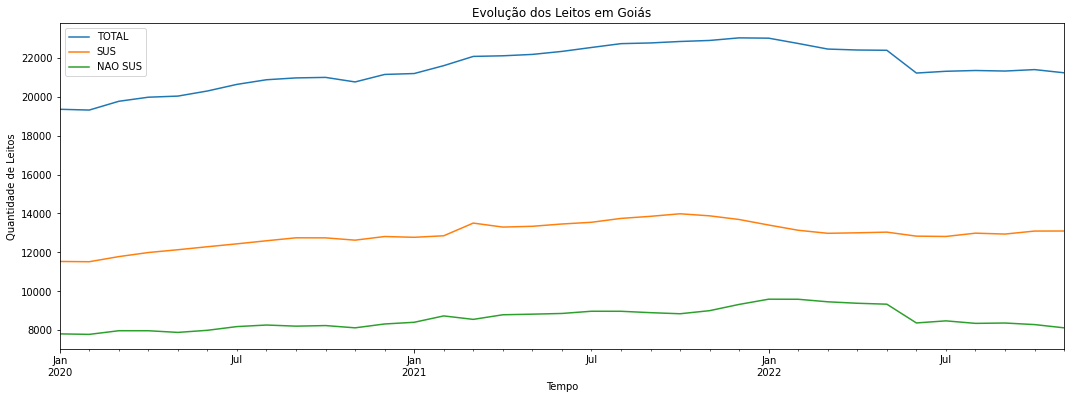

In [15]:
#Grafico 1 da evolução de leitos ao decorrer do tempo
ax = df_grafico_1.plot.line(x='data', y=['TOTAL', 'SUS', 'NAO SUS'], figsize=(18,6), title='Evolução dos Leitos em Goiás')
ax.set_xlabel("Tempo")
ax.set_ylabel("Quantidade de Leitos")

Abaixo irei preparar os dados para usar na visualização do Tableau

In [16]:
#agrupar por CODUFMU e data/Competencia
df_grafico_2 = final_df.groupby(['CODUFMUN', 'data']).agg(
     TOTAL = ('QT_EXIST','sum')
     ).reset_index()

In [17]:
#Pego a primeira ocorrencia do numero de leitos e usarei ele como referencia para medir a % da evolução no decorrer do tempo
df_ref_leitos = df_grafico_2.groupby(['CODUFMUN'])['TOTAL'].first().reset_index()
df_ref_leitos.columns = ['CODUFMUN', 'QTD_REF_LEITOS']
df_ref_leitos

,CODUFMUN,QTD_REF_LEITOS
0,520010,9
1,520013,72
2,520017,12
3,520025,41
4,520030,34
...,...,...
189,522170,27
190,522185,68
191,522200,40
192,522205,16


In [18]:
# faço o join dos dataframes para adicionar uma coluna com a quantidade de leitos referencia
df_grafico_2 = pd.merge(df_grafico_2, df_ref_leitos, on=['CODUFMUN'])
df_grafico_2

,CODUFMUN,data,TOTAL,QTD_REF_LEITOS
0,520010,2020-01-01,9,9
1,520010,2020-02-01,9,9
2,520010,2020-03-01,9,9
3,520010,2020-04-01,9,9
4,520010,2020-05-01,9,9
...,...,...,...,...
6646,522220,2022-07-01,13,13
6647,522220,2022-08-01,13,13
6648,522220,2022-09-01,13,13
6649,522220,2022-10-01,13,13


In [19]:
# Adiciono uma coluna que indique a porcentagem de aumento de leitos ao invés do número bruto de leitos
df_grafico_2['DELTA'] = df_grafico_2['TOTAL']/df_grafico_2['QTD_REF_LEITOS'] -1
df_grafico_2

,CODUFMUN,data,TOTAL,QTD_REF_LEITOS,DELTA
0,520010,2020-01-01,9,9,0.0
1,520010,2020-02-01,9,9,0.0
2,520010,2020-03-01,9,9,0.0
3,520010,2020-04-01,9,9,0.0
4,520010,2020-05-01,9,9,0.0
...,...,...,...,...,...
6646,522220,2022-07-01,13,13,0.0
6647,522220,2022-08-01,13,13,0.0
6648,522220,2022-09-01,13,13,0.0
6649,522220,2022-10-01,13,13,0.0


In [20]:
#Adiciono a coluna de municipios, inicialmente vazia
df_grafico_2['MUNICIPIO'] = ' '

#Coloco o nome do municipio no df, baseado no dicionario de dados
for i, row in df_grafico_2.iterrows():
    municipio = dicionario_municipio[int(df_grafico_2.at[i,'CODUFMUN'])]
    df_grafico_2.at[i,'MUNICIPIO'] = municipio

In [21]:
df_grafico_2

,CODUFMUN,data,TOTAL,QTD_REF_LEITOS,DELTA,MUNICIPIO
0,520010,2020-01-01,9,9,0.0,Abadiânia
1,520010,2020-02-01,9,9,0.0,Abadiânia
2,520010,2020-03-01,9,9,0.0,Abadiânia
3,520010,2020-04-01,9,9,0.0,Abadiânia
4,520010,2020-05-01,9,9,0.0,Abadiânia
...,...,...,...,...,...,...
6646,522220,2022-07-01,13,13,0.0,Vila Boa
6647,522220,2022-08-01,13,13,0.0,Vila Boa
6648,522220,2022-09-01,13,13,0.0,Vila Boa
6649,522220,2022-10-01,13,13,0.0,Vila Boa


In [22]:
#Removo as colunas desnecessárias
df_grafico_2.drop(['CODUFMUN'], axis = 1, inplace = True)

In [23]:
#Renomeio as colunas
df_grafico_2.columns = ['COMPETENCIA', 'QTD_LEITOS', 'QTD_REF_LEITOS', 'DELTA', 'MUNICIPIO']

In [24]:
#Exportar para CSV para lermos no tableau
df_grafico_2.to_excel("TesteTableauCovidGO.xlsx", index=False)  